
# Introduction to MNE-Python and EEG Data

MNE-Python is an open-source library developed for processing electrophysiological data, especially Magnetoencephalography (MEG) and Electroencephalography (EEG). It provides tools for data input/output, preprocessing, visualization, source estimation, statistical analysis, and more.

EEG (Electroencephalography) is a technique that measures the electrical activity of the brain. It is non-invasive, with electrodes placed on the scalp. EEG can be used in a variety of applications, such as diagnosing epilepsy, studying cognitive functions, brain-computer interfaces, and more.

In this notebook, we'll focus on loading and preprocessing EEG data using MNE-Python.



# Loading Sample EEG Data

MNE-Python comes with some sample datasets. For this notebook, we'll use the sample EEG data provided.


In [ ]:
# THIS WILL TAKE A WHILE TO RUN
import mne

# Load the sample EEG data (large EEG dataset with 67 channels)
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = str(sample_data_folder) + '/MEG/sample/sample_audvis_raw.fif'

# Read the raw data file
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)
raw.pick_types(meg=False, eeg=True, eog=True)  # We'll focus on EEG and EOG channels
raw.info


# Example of Downloading from CSV file 
For the MNIST EEG dataset we will be starting out with a CSV file (from pandas) and reading with MNE.

RUNNING THIS CODE CELL WILL PRODUCE AN ERROR BECAUSE THERE IS NO data.csv

In [ ]:
import pandas as pd

data = pd.read_csv('data.csv')

channels = ['EEG_001', 'EEG_002', ..., 'EEG_128']
sfreq = 250 # 250 Hz
ch_types = 'eeg'

# Create the info structure needed by MNE
info = mne.create_info(ch_names=channels, sfreq=sfreq, ch_types=ch_types)

# create Raw object with data and info
raw = mne.io.RawArray(data[channels].T, info) # transposed because mne expects channels x time and not time x channels

# after this you can use the raw object as usual

EDF (European Data Format) is also a common data format for EEG

In [ ]:
file_path = 'path.edf'

raw = mne.io.read_raw_edf(file_path, preload=True)

raw.pick_types(meg=False, eeg=True, eog=False)  # We'll focus on EEG channels

# after this you can use the raw object as usual


# Visualizing Raw EEG Data

MNE-Python provides tools to visualize the raw EEG data.


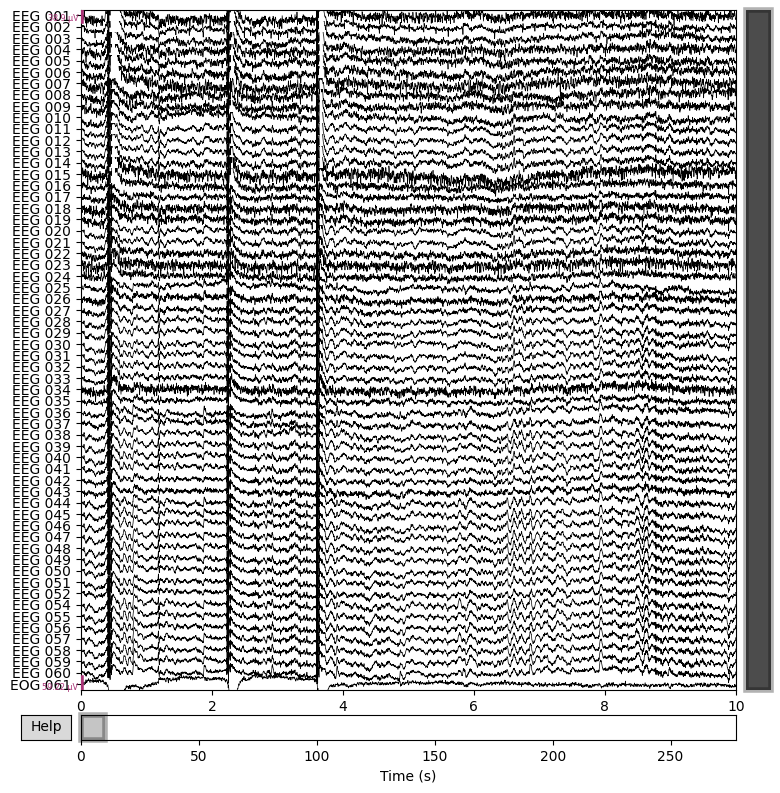

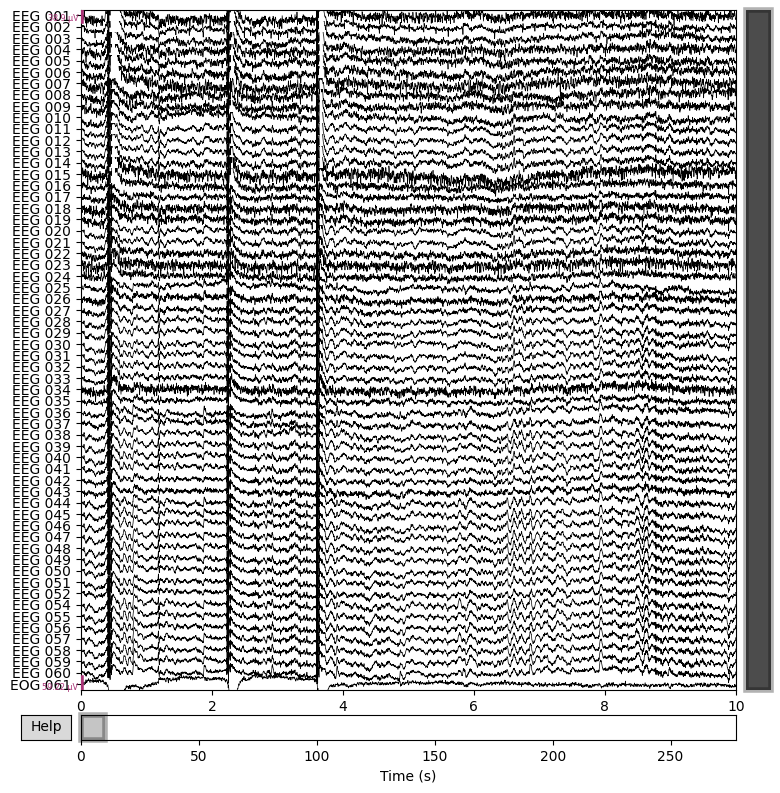

In [6]:

# Plot the first few seconds of raw data
raw.plot(start=0, duration=10, n_channels=60, scalings='auto')



# Applying Different Types of Filtering

Filtering is a crucial step in EEG data processing. It can help in removing noise and unwanted frequency components.

Here, we'll apply:
1. Low-pass filter
2. High-pass filter
3. Band-pass filter
4. Notch filter (to remove power line noise)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 199 samples (0.331 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1983 samples (3.302 sec)



[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1983 samples (3.302 sec)



[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 3965 samples (6.602 sec)



[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.3s finished


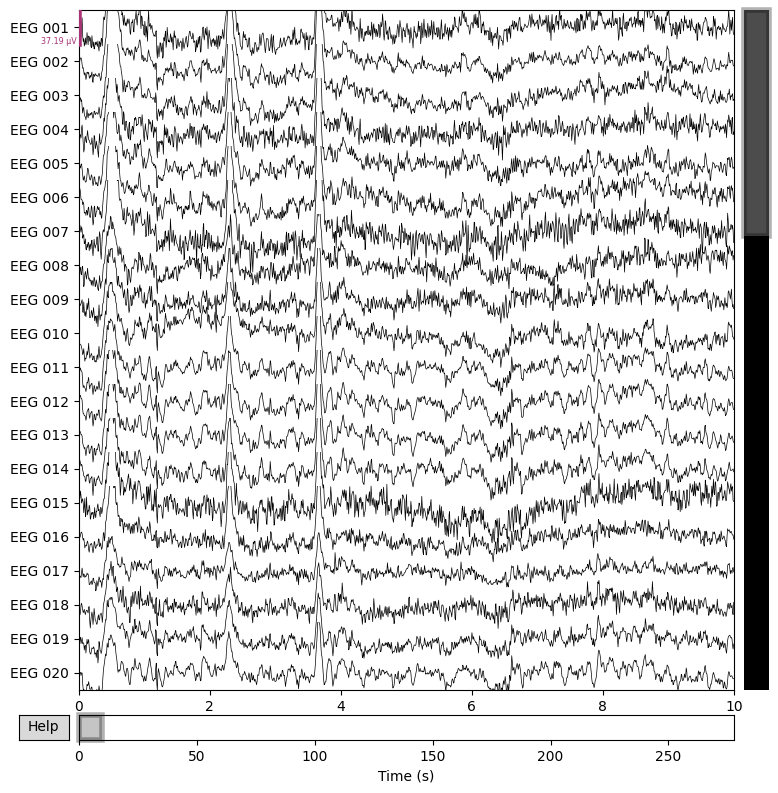

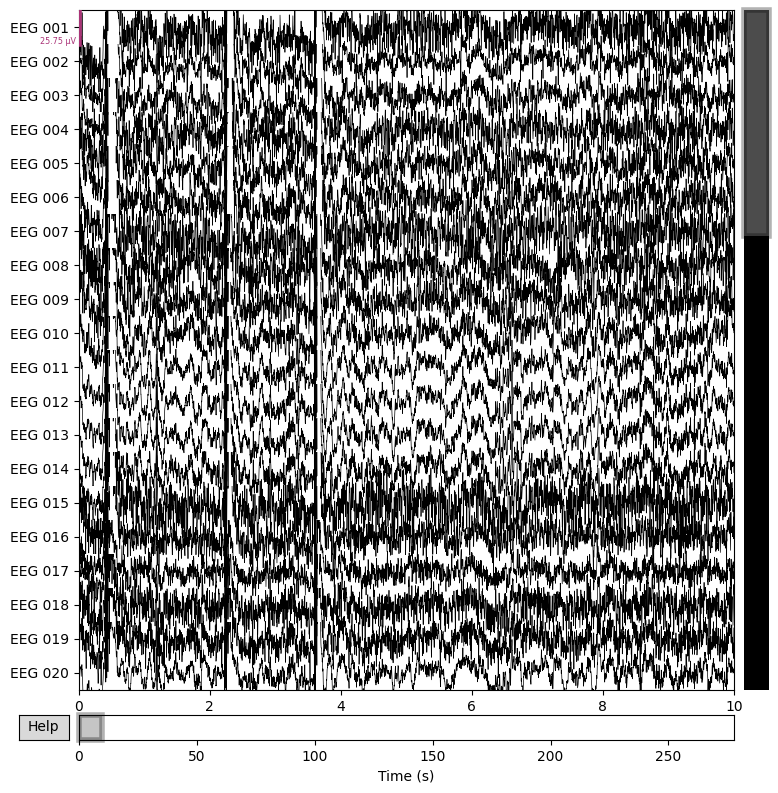

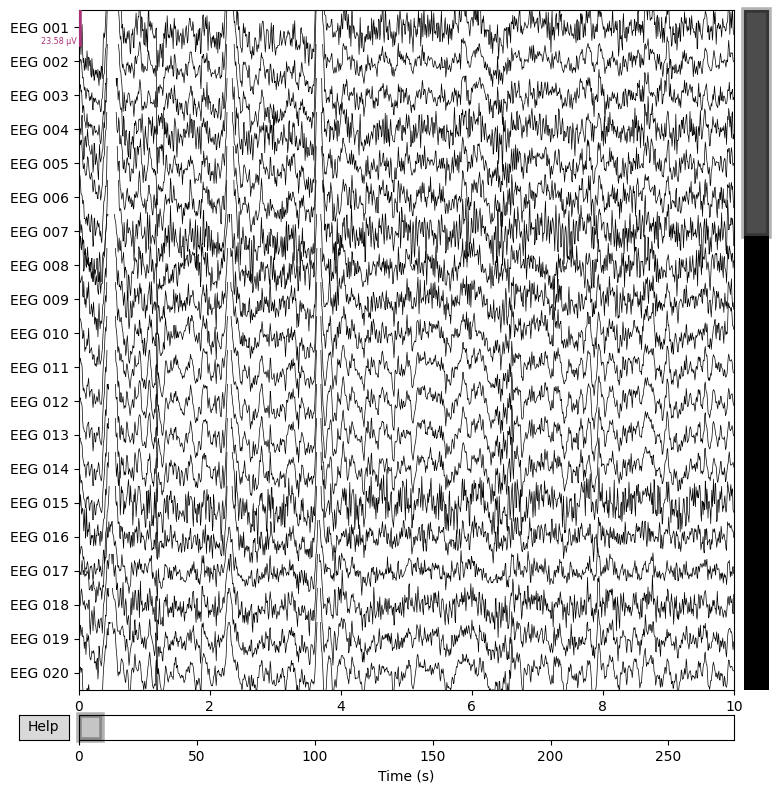

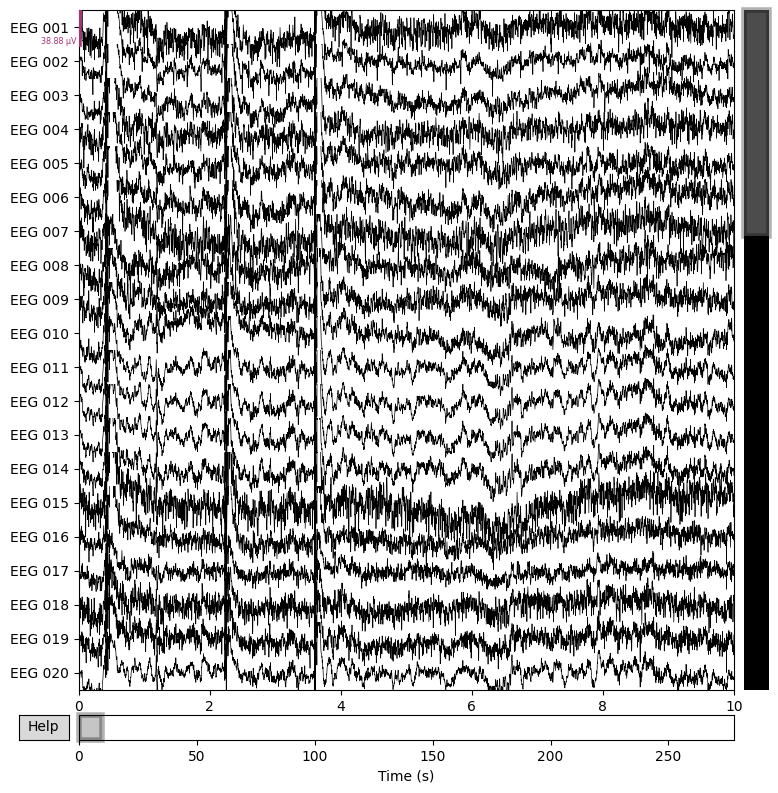

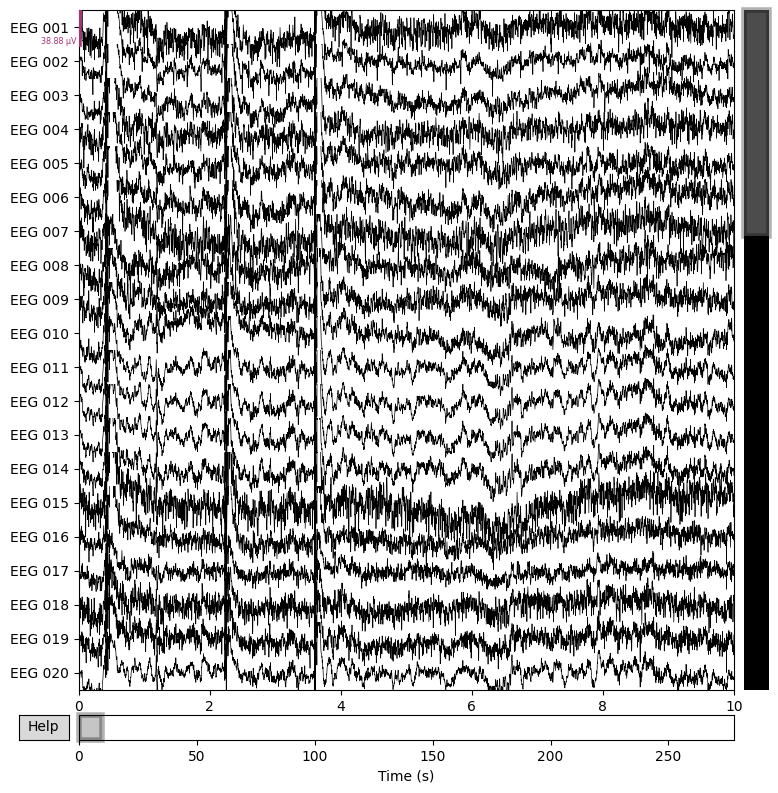

In [10]:

# Apply and plot different types of filtering

# Low-pass filter
raw_low_pass = raw.copy().filter(l_freq=None, h_freq=40)

# High-pass filter
raw_high_pass = raw.copy().filter(l_freq=1, h_freq=None)

# Band-pass filter
raw_band_pass = raw.copy().filter(l_freq=1, h_freq=40)

# Notch filter (typically power line noise is at 50 or 60 Hz)
raw_notch = raw.copy().notch_filter(freqs=60)

raw_low_pass.plot(start=0, duration=10, n_channels=20, scalings='auto', title="Low-pass filtered")
raw_high_pass.plot(start=0, duration=10, n_channels=20, scalings='auto', title="High-pass filtered")
raw_band_pass.plot(start=0, duration=10, n_channels=20, scalings='auto', title="Band-pass filtered")
raw_notch.plot(start=0, duration=10, n_channels=20, scalings='auto', title="Notch filtered")
